In [4]:
## Passing Y as input while conda asks for confirmation, we use yes command
!yes Y | conda install faiss-gpu cudatoolkit=10.0 -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cudatoolkit=10.0
    - faiss-gpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    conda-4.10.3               |   py36h06a4308_0         2.9 MB
    faiss-gpu-1.6.3            |   py36h1a5d453_0        34.2 MB  pytorch
    openssl-1.0.2u             |       h7b6447c_0         2.2 MB
    ------------------------------------------------------------
                                           Total:        39.5 MB

The following NEW packages will be INSTALLED:

  

In [5]:
# !wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
# !tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2
# !cp -r site-packages/* /opt/conda/lib/python3.6/site-packages/
# # !export LD_LIBRARY_PATH="/kaggle/working/lib/" 
# !cp /kaggle/working/lib/libfaiss.so /usr/local/cuda/lib64/

In [6]:
!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2 --wildcards 'lib/*'
!tar xvjf tsnecuda-2.1.0-cuda100.tar.bz2 --wildcards 'site-packages/*'
!cp -r site-packages/* /opt/conda/lib/python3.6/site-packages/
# !export LD_LIBRARY_PATH="/kaggle/working/lib/" 
!cp /kaggle/working/lib/libfaiss.so /usr/local/cuda/lib64/

--2022-11-05 02:00:28--  https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda100.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.93.24, 104.17.92.24, 2606:4700::6811:5c18, ...
Connecting to anaconda.org (anaconda.org)|104.17.93.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5d019c23c7424a015486440c/5d790a95778a870c42137059?response-content-disposition=attachment%3B%20filename%3D%22tsnecuda-2.1.0-cuda100.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27tsnecuda-2.1.0-cuda100.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=600&X-Amz-Date=20221105T020028Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEPn%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJGMEQCIGDCoWq%2BMJsojm0B9D1RGKSCd9faYHZHp8fIre37Ep5TAiBYlwAq5QEKUhb%2BKI3I7OJ4mDB0eI6%2F5UJV6axHdlqqhSrVBAji%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAAaDDQ1NTg2NDA5ODM3OCIM

In [7]:
!apt search openblas
!yes Y | apt install libopenblas-dev 
# !printf '%s\n' 0 | update-alternatives --config libblas.so.3 << 0
# !apt-get install libopenblas-dev 
!

Sorting... Done
Full Text Search... Done
libopenblas-base/oldstable 0.2.19-3 amd64
  Optimized BLAS (linear algebra) library (shared library)

libopenblas-dev/oldstable 0.2.19-3 amd64
  Optimized BLAS (linear algebra) library (development files)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libopenblas-base
The following NEW packages will be installed:
  libopenblas-base libopenblas-dev
0 upgraded, 2 newly installed, 0 to remove and 13 not upgraded.
Need to get 7602 kB of archives.
After this operation, 91.5 MB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 libopenblas-base amd64 0.2.19-3 [3793 kB]
Get:2 http://deb.debian.org/debian stretch/main amd64 libopenblas-dev amd64 0.2.19-3 [3809 kB]
Fetched 7602 kB in 1s (5424 kB/s)     
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselect

In [66]:
import faiss
from tsnecuda import TSNE
import pandas as pd
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [54]:
image_list = [cv2.resize(cv2.imread("../input/ocrdataset/data_2021/bdh/"+x, 0), (100, 33)).flatten() for x in sorted(os.listdir("../input/ocrdataset/data_2021/bdh/"))]
#plt.imshow(image_list[666])

In [55]:
x = np.array(image_list)

In [56]:
y = np.array(pd.read_excel('../input/ocrdataset/data_2021/code_bdh.xlsx', header=None))

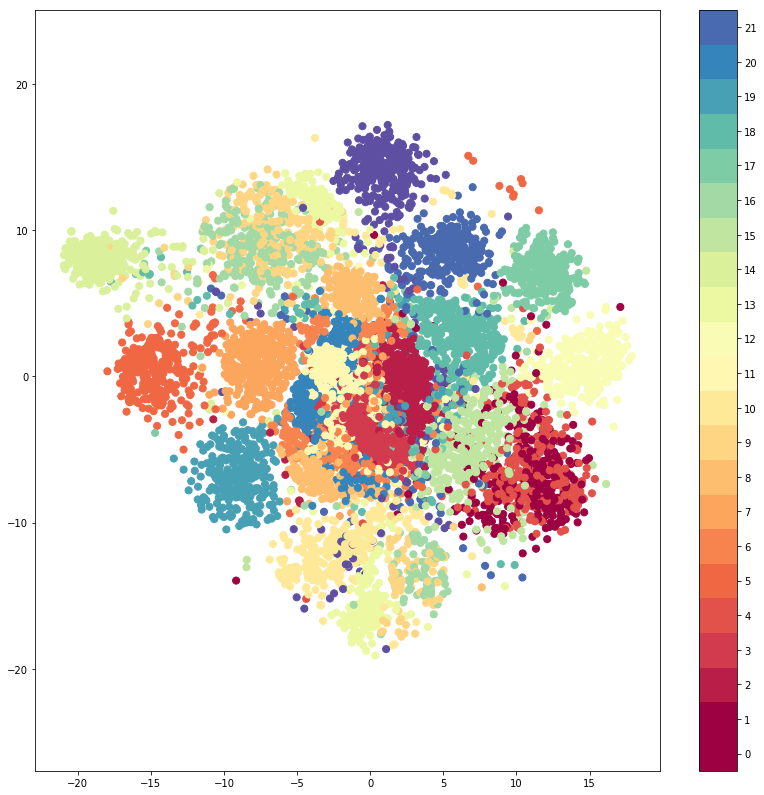

In [58]:
tsne = TSNE(n_components=2,verbose=5, perplexity=40, n_iter=10000, learning_rate=200).fit_transform(x)
df = pd.DataFrame()
df['x'] = tsne[:, 0]
df['y'] = tsne[:, 1]
df['c'] = y

plt.figure(figsize=(14, 14))
plt.scatter(df['x'], df['y'], c=df['c'],s=50, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))

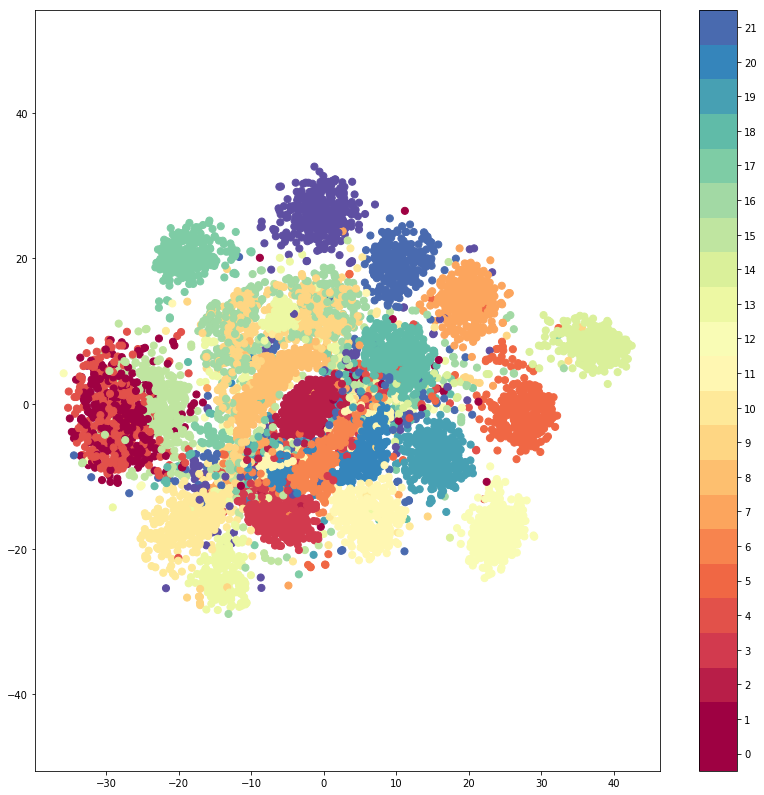

In [61]:
pca_250 = PCA(n_components=250)
pca_result_250 = pca_250.fit_transform(x)
tsne = TSNE(n_components=2,verbose=5, perplexity=30, n_iter=10000, learning_rate=200).fit_transform(pca_result_250)
df = pd.DataFrame()
df['x'] = tsne[:, 0]
df['y'] = tsne[:, 1]
df['c'] = y

plt.figure(figsize=(14, 14))
plt.scatter(df['x'], df['y'], c=df['c'],s=50, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(23)-0.5).set_ticks(np.arange(22))

# raw data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='gpu_hist'  
)
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
confusion = confusion_matrix(y_test, ypred)
print('Confusion Matrix\n')
print(confusion)
print(classification_report(y_test, ypred, digits=4))

Confusion Matrix

[[42  0  2  6  0  0  0  0  0  2  0  1  0  0  2  0  0  1  0  0  0  0]
 [ 0 48  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  1  0  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0 49  0  1  0  0  0  0  0  0  0  0  1  0  0  2  0  0  1]
 [ 0  3  1  0  0 38  0  2  0  0  0  0  1  0  0  0  1  0  1  1  1  0]
 [ 0  0  0  0  4  0 50  0  1  0  0  0  0  0  0  3  0  0  0  0  0  1]
 [ 0  0  1  0  0  1  0 43  1  0  1  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  3  2 44  0  0  1  0  1  0 13  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  1 33  0  0  5  0  0  0  0  0  0  0  1  2]
 [ 0  1  3  0  0  1  0  0  0  0 55  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 46  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0 39  0  3  1  1  0  0  0  0]
 [ 1  1  1  2  0

In [71]:
X_train, X_test, y_train, y_test = train_test_split(tsne, y, test_size=0.15, random_state=42)
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='gpu_hist'  
)
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
confusion = confusion_matrix(y_test, ypred)
print('Confusion Matrix\n')
print(confusion)
print(classification_report(y_test, ypred, digits=4))

Confusion Matrix

[[25  0  0 19  0  1  1  0  0  2  1  0  0  0  5  0  0  2  0  0  0  0]
 [ 0 45  1  0  0  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0 39  0  0  4  0  0  0  0  1  0  1  0  0  0  0  0  1  2  0  0]
 [18  0  0 17  0  0  1  0  0  0  0  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  1  0 45  0  0  0  2  0  0  2  0  0  0  1  0  1  1  1  0  0]
 [ 0  4  3  0  0 35  0  0  0  0  1  0  0  0  1  0  0  2  1  2  0  0]
 [ 0  0  1  0  0  0 50  0  0  0  0  0  2  1  1  0  0  2  0  0  2  0]
 [ 0  4  1  0  0  1  0 36  1  0  0  0  2  0  1  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  1  1  3 27  0  1  1  4  1  0 24  0  1  0  0  1  0]
 [ 0  1  2  0  0  0  0  0  1 31  0  0  2  0  3  1  0  0  0  0  0  2]
 [ 0  0  4  0  0  4  0  0  0  2 42  1  0  0  1  1  0  1  0  4  2  0]
 [ 1  0  0  0  0  1  0  0  0  0  0 44  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  2  0  0 36  0  1  2  0  0  0  0  0  4]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 42  0  0  0  0  0  0  3  0]
 [ 5  0  2  2  0

In [72]:
X_train, X_test, y_train, y_test = train_test_split(pca_result_250, y, test_size=0.15, random_state=42)
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='gpu_hist'  
)
clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
confusion = confusion_matrix(y_test, ypred)
print('Confusion Matrix\n')
print(confusion)
print(classification_report(y_test, ypred, digits=4))

Confusion Matrix

[[39  0  0  5  0  0  0  0  0  2  2  1  0  0  5  0  0  2  0  0  0  0]
 [ 0 44  1  0  0  1  0  2  1  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 5  0  0 34  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 50  0  1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1]
 [ 0  1  1  0  0 45  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  0 53  0  1  0  0  0  0  0  0  3  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0 45  0  0  0  0  1  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1 45  1  0  0  1  2  0 14  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0 36  0  0  4  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  0  0  1  0  0  0  0 59  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  2  0  0  0  0  0  0  0 45  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  0 45  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 45  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0